In [8]:
%matplotlib inline 
# above line allows for showing plots in a cell easily
import matplotlib # the main plotting library
import numpy as np # allows for arrays
import matplotlib.pyplot as plt # getting specific plotting functions
import urllib # URL import functions
import pandas as pd # nice data utilities

In [9]:
url='https://raw.githubusercontent.com/dwblair/riffle-lithium-ion-cold-test/master/2016_3_3_afternoon.csv' # the url for the CSV

In [10]:
response = urllib.request.urlopen(url) # treating the URL as a file

In [11]:
a=pd.read_csv(response,names=['date','temp','batt','a0']) # reading that file in as a CSV

In [12]:
b=a.index/60 # minutes

In [13]:
from datetime import datetime

t=[]
tp=datetime.strptime(a.date[0],"%Y-%m-%d %H:%M:%S")
tstart=tp.strftime("%s")
    
for i in range (0,len(a.date)):
    tp=datetime.strptime(a.date[i],"%Y-%m-%d %H:%M:%S")
    ts=tp.strftime("%s")
    t.append((float(ts)-float(tstart))/3600) #hours

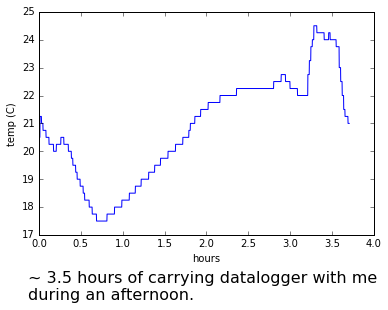

In [29]:
plt.plot(t,a.temp); plt.xlabel('hours'); plt.ylabel('temp (C)');
plt.figtext(.1, -0.1, "~ 3.5 hours of carrying datalogger with me\nduring an afternoon.", size=16)

Above: about 3.5 hours of carrying datalogger with me during afternoon.

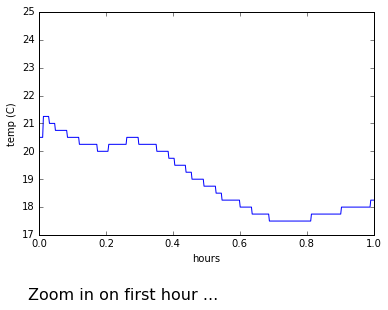

In [30]:
plt.plot(t,a.temp); plt.xlim(0,1.0);plt.xlabel('hours'); plt.ylabel('temp (C)')
plt.figtext(.1, -0.1, "Zoom in on first hour ...", size=16)

```
Fractional Hour:  activity

0.00:  put datalogger in bag
0.05:  left house
0.20:  entered coffee shop
0.30:  left coffee shop, went outside
0.80:  arrived work

```

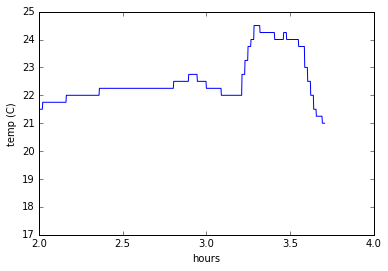

In [18]:
plt.plot(t,a.temp); plt.xlim(2.0,4.0);plt.xlabel('hours'); plt.ylabel('temp (C)')

```
Fractional Hour:  activity

2.90:  left work, went outside 
3.25:  entered restaurant 
3.60:  left restaurant, went outside 

```